In [4]:
# Using HAARCascade classifier detecting face from a image

import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img= cv2.imread('test4.jpg')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    
cv2.imshow('img', img)  
cv2.waitKey()

113

In [3]:
# Detecting image using web cam:

#https://www.youtube.com/watch?v=7IFhsbfby9s

import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        
    cv2.imshow('img', img)    
    


    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
        

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [18]:
#https://www.youtube.com/watch?v=g4Urfno4aTc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
df = pd.read_csv("face_data.csv")

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [20]:
#seperating label column
labels= df["target"]

In [25]:
"removing label column"
pixels = df.drop(["target"], axis=1)

In [22]:

def show_orignal_images(pixels):

	#Displaying Orignal Images

	fig, axes = plt.subplots(6, 10, figsize=(11, 7),

	                         subplot_kw={'xticks':[], 'yticks':[]})

	for i, ax in enumerate(axes.flat):

	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
 

	plt.show()

In [23]:

def show_eigenfaces(pca):

	#Displaying Eigenfaces

	fig, axes = plt.subplots(3, 8, figsize=(9, 4),

	                         subplot_kw={'xticks':[], 'yticks':[]})

	for i, ax in enumerate(axes.flat):

	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')

	    ax.set_title("PC " + str(i+1))

	plt.show()

In [26]:
np.array(pixels).shape

(400, 4096)

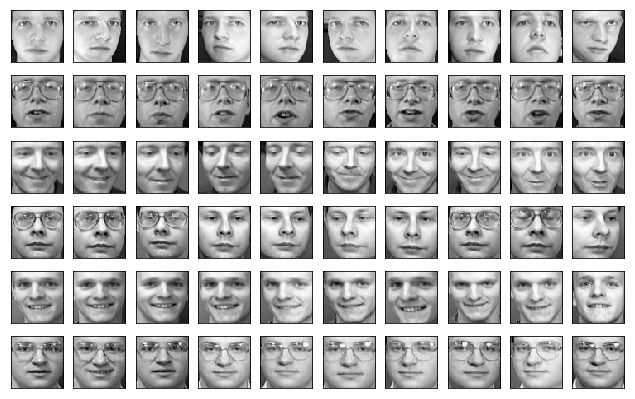

In [27]:
show_orignal_images(pixels)

In [29]:
#Train Test split

x_train, x_test, y_train, y_test = train_test_split(pixels, labels)

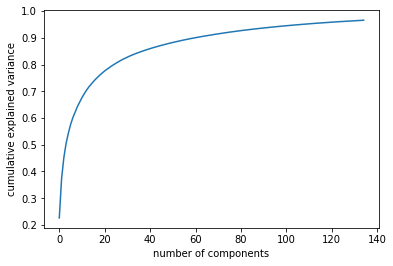

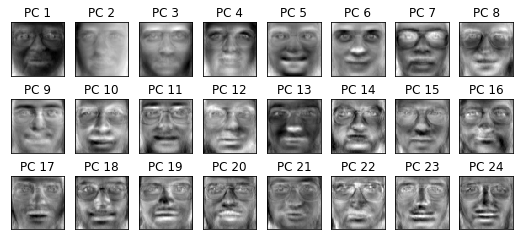

In [33]:
## Step 3: Performing PCA.

pca = PCA(n_components=135).fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')

plt.ylabel('cumulative explained variance');

plt.show()



show_eigenfaces(pca)

In [34]:
## Step 4: Project Training data to PCA

print("Projecting the input data on the eigenfaces orthonormal basis")

Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


In [35]:

## Step 5: Initialize Classifer and fit training data

clf = SVC(kernel='rbf',C=1000,gamma=0.001)

clf = clf.fit(Xtrain_pca, y_train)


In [36]:
## Step 6: Perform testing and get classification report

print("Predicting people's names on the test set")

t0 = time()

Xtest_pca = pca.transform(x_test)

y_pred = clf.predict(Xtest_pca)

print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.025s
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         1
          4       0.67      1.00      0.80         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         3
          9       1.00      1.00      1.00         3
         10       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         3
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         2
         15       1.00      1.00      1.00         4
         16       1.00      1.00      1.00         4
         17       1.00      1.00      1.0